### Juan C. S. Herrera

###**Sweetness and Networks**

In [2]:
#INSTALL AND UPGRADE PACKAGES
#!pip install networkx
#!pip install --upgrade networkx
#!pip install --upgrade pandas
#!pip install --upgrade scikit
#!pip install --upgrade matplotlib
#!pip install --upgrade networkx
#!pip install --upgrade scikit-learn

In [3]:
#IMPORT PACKAGES
#library for data management as data frames
import pandas as pd
#for network science
import networkx as nx
from networkx.algorithms import bipartite
#plotting and visualizations
import matplotlib.pyplot as plt
#sklearn (Jaccard)
from sklearn.metrics import pairwise_distances
import numpy as np

**3. ** Import data

In [4]:
# Convert to a DataFrame and render.
carrusel_df = pd.read_csv('/Users/juan/Dropbox/ACADEMICO/NYU PHD/Y6/Practicing Food Studies Book Chapter/Sweetnessandnetworks.csv')

#convert year, month, day to numeric variables
carrusel_df[["month", "day", "year", "sweetener"]] = carrusel_df[["month", "day", "year", "sweetener"]].apply(pd.to_numeric)

#look at the first x values
carrusel_df.head(10)
#carrusel_df.colnames

,date,month,day,year,recipe_name,ingredient_en,category,sweetener
0,3/18/77,3,18,1977,ensalada_rusa_3181977,potato,vegetable,0
1,3/18/77,3,18,1977,ensalada_rusa_3181977,apple,fruit,0
2,3/18/77,3,18,1977,ensalada_rusa_3181977,carrot,vegetable,0
3,3/18/77,3,18,1977,ensalada_rusa_3181977,vetch,plant,0
4,3/18/77,3,18,1977,ensalada_rusa_3181977,mayonnaise,plant derivative,0
5,3/18/77,3,18,1977,ensalada_rusa_3181977,salt,mineral,0
6,3/18/77,3,18,1977,ensalada_rusa_3181977,pepper,spice,0
7,3/18/77,3,18,1977,huevos_en_canastilla_3181977,egg,animal product,0
8,3/18/77,3,18,1977,huevos_en_canastilla_3181977,puff_pastry,cereal/crop,0
9,3/18/77,3,18,1977,huevos_en_canastilla_3181977,salad,vegetable,0


**4.**  Create Networks

In [5]:
#load NODE data as lists. The symbols such as (' , etc were concatenated on 

nodesrecipes = list(carrusel_df.recipe_name.unique())
nodesingredients = list(carrusel_df.ingredient_en.unique())
edgesrecipeingredient = list(zip(carrusel_df.recipe_name, carrusel_df.ingredient_en))

#check some values if needed
#print(nodesrecipes[0:5])
#print(nodesingredients[0:5])
#print(edgesrecipeingredient[0:5])


#Load Edge data --that is the connections between nodes


#we want these statistics on the output
print("Number of Recipes:",len(nodesrecipes))
print("Number of Ingredients:",len(nodesingredients))


#checks that there are no ingredients present in both nodesrecipes and nodeingredients
for x in nodesrecipes:
  if x in nodesingredients:
    print("WARNING: The following ingredients are listes as ingredients AND recipes: ",x)    

Number of Recipes: 5981
Number of Ingredients: 557


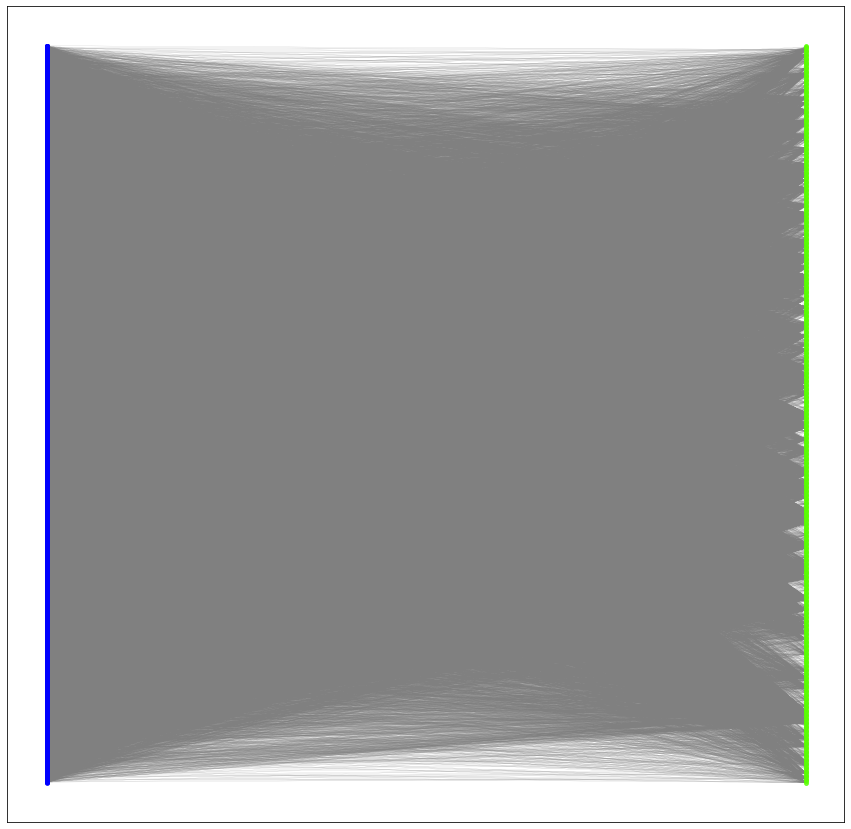

In [6]:
import networkx as nx
#from networkx.algorithms import bipartite

#here we are creating an empty graph (network)
B = nx.Graph()

#we are adding the nodes, which we loaded on the previous step. 
#note how we add the bipartite nodes below
B.add_nodes_from(nodesrecipes, bipartite=0)
B.add_nodes_from(nodesingredients, bipartite=1)

plt.figure(figsize=(15,15))


#we add the edges
B.add_edges_from(edgesrecipeingredient)

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)

nx.draw_networkx_nodes(B,pos,
                       nodelist=nodesrecipes,
                       node_color='b',
                       node_size=15,
                   alpha=0.8)

# Let's visualize the network
nx.draw_networkx_nodes(B,pos,
                       nodelist=nodesingredients,
                       node_color='#5AFE03',
                       node_size=15,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(B,pos,edge_color='gray', width = 0.1)

#labels
#nx.draw_networkx_labels(B,pos,nodelist=nodesrecipes,font_size=15)
#nx.draw_networkx_labels(B,pos,nodelist=nodesingredients,font_size=0.0000001)


plt.show()

#plt.savefig("bipartitecumulative.jpg")
#delete the # below if you want to save the plot
#files.download("bipartitecumulative.jpg") 

**5** Let's project the two mode network into a one mode network. We are interested in finding how ingredients relate to one another based on the recipes they are present in

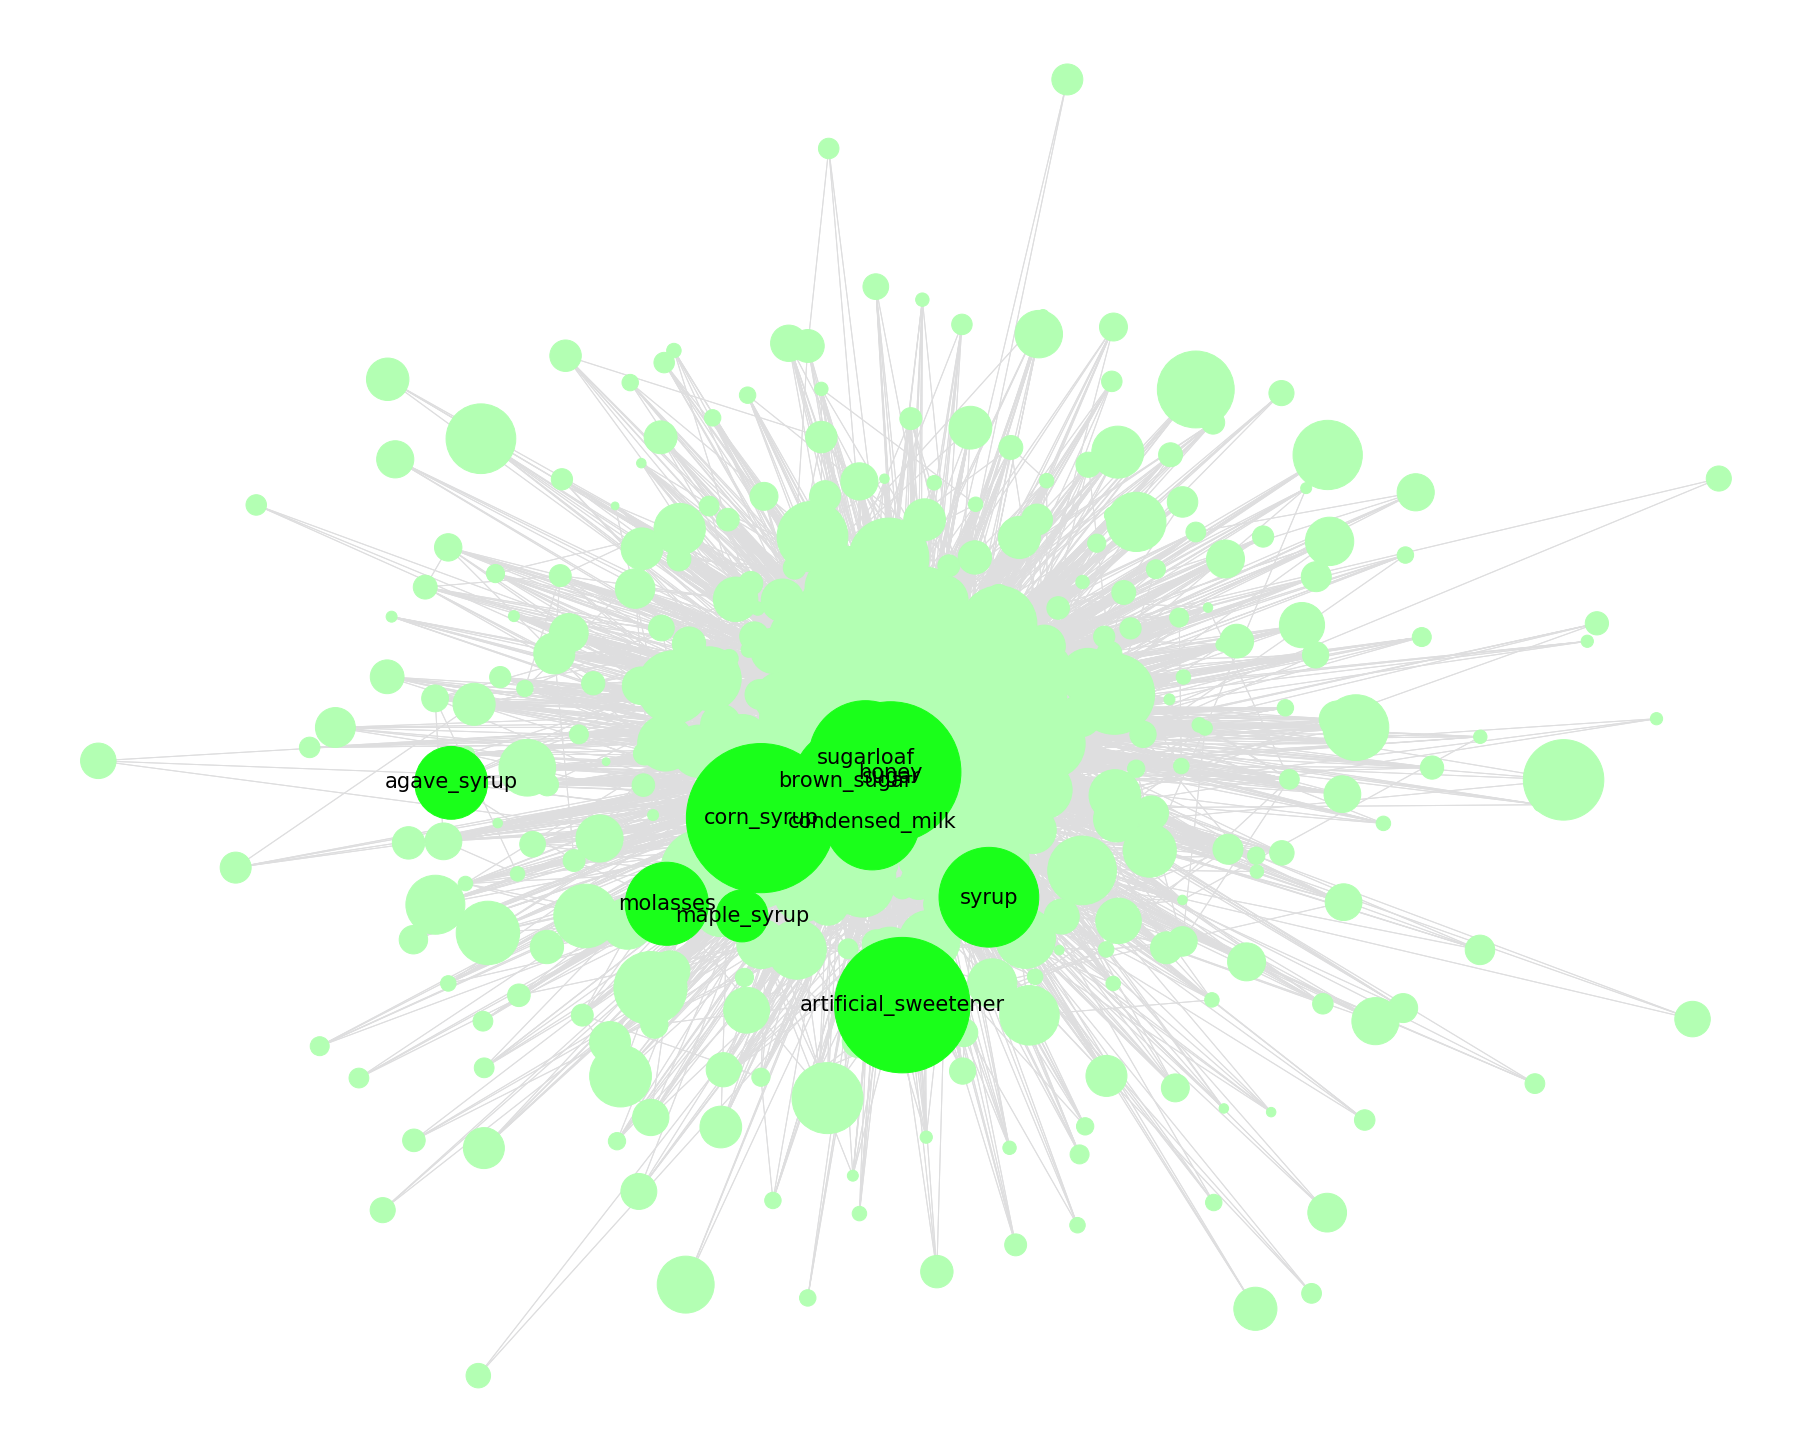

In [6]:
#Get list of sweeteners and non sweeteners to color 
sweeteners_tolist = list(zip(carrusel_df.sweetener, carrusel_df.ingredient_en))

#iterate get both
sweeteners = [(v) for u, v in sweeteners_tolist if u == 1]
non_sweeteners = [(v) for u, v in sweeteners_tolist if u == 0]

#make unique both
sweeteners = pd.DataFrame(sweeteners, columns =['ingredients']) 
non_sweeteners = pd.DataFrame(non_sweeteners, columns =['ingredients']) 

#get as list
sweeteners = list(sweeteners.ingredients.unique())
non_sweeteners = list(non_sweeteners.ingredients.unique())


#projection into ingrediento nodes
G = bipartite.weighted_projected_graph(B,nodesingredients)
#get the node degrees
d = dict(G.degree)

plt.figure(figsize=(25,20))

pos = nx.spring_layout(G)
#pos = nx.kamada_kawai_layout(G)

#DRAW
#sweeteners



#Now only add labels to the nodes you require (the hubs in my case)

labels = {}    
for node in G.nodes():
    if node in sweeteners:
        #set the node name as the key and the label as its value 
        labels[node] = node

#non sweeteners
nx.draw(G, pos,
        nodelist=non_sweeteners, 
        with_labels=False, 
        edge_color = '#DEDEDF',
        node_color= '#b3ffb3',
        node_size=[v * 30 for v in d.values()])

#sweeteners
nx.draw(G, pos,
        nodelist=sweeteners, 
        with_labels=False, 
        edge_color = '#DEDEDF', 
        node_color= '#1aff1a',
        node_size=[v * 50 for v in d.values()])

#add labels
nx.draw_networkx_labels(G,pos,labels,font_size=21, font_color = 'k', labelweight = 'bold')


#plt.savefig('sweetnerssandnetworksgraph.svg')
#plt.savefig('sweetnerssandnetworksgraph.jpeg', dpi = 300)
#plt.savefig('sweetnerssandnetworksgraphtransparent.jpeg', transparent = True, dpi = 300)

plt.show()


#delete the # below if you want to save the plot

#print(nx.degree_histogram(G))

Analysis Year by Year (either wirth sliding window or cumulative)

In [130]:
##YEARLY ANALYSIS

#define functions
#def stat_of_interest(statdict,ingredient):
    #iterate over vaccinated people to get their neighbors
#    if ingredient in statdict:
#        result = statdict[ingredient] / statdict[max(statdict, key=statdict.get)]
#    if ingredient not in statdict:
#        result = 1 + np.nan
#    return result
    
def stat_of_interest(statdict,ingredient):
    #iterate over vaccinated people to get their neighbors
    if ingredient in statdict:
        result = statdict[ingredient]
    if ingredient not in statdict:
        result = 1 + np.nan
    return result    
    
#define variables
year_stat = []

sugar_stat = []
brown_sugar_stat = []
sugarloaf_stat = []
condensed_milk_stat = []
syrup_stat = []
corn_syrup_stat = []
honey_stat = []
artificial_sweetener_stat = []
molasses_stat = []
maple_syrup_stat = []
agave_syrup_stat = []

#get statistic of interest (YEAR)
for x in range(1977, 2018, 1):
    temp_df = (carrusel_df.loc[(carrusel_df['year'] < (x + 5)) & (carrusel_df['year'] >= x)])
    #carrusel_df.loc[(carrusel_df['year'] == x)]

    nodesrecipes_temp = list(temp_df.recipe_name.unique())
    nodesingredients_temp = list(temp_df.ingredient_en.unique())
    edgesrecipeingredient_temp = list(zip(temp_df.recipe_name, temp_df.ingredient_en))
  #create Temporal Bipartite Network
  #here we are creating an empty graph (network)
    B_temp = nx.Graph()
  #we are adding the nodes, which we loaded on the previous step. 
  #note how we add the bipartite nodes below
    B_temp.add_nodes_from(nodesrecipes_temp, bipartite=0)
    B_temp.add_nodes_from(nodesingredients_temp, bipartite=1)
  #add edges
    B_temp.add_edges_from(edgesrecipeingredient_temp)
    G_temp = bipartite.weighted_projected_graph(B_temp,nodesingredients_temp)
    
  #get the statistic of interest !
    #stats_result = dict(nx.degree(G_temp))
    stats_result = dict(nx.pagerank(G_temp)) 
    
  #populate variables
    year_stat.append(x)
    
    sugar_stat.append(stat_of_interest(stats_result,'sugar'))
    brown_sugar_stat.append(stat_of_interest(stats_result,'brown_sugar'))
    sugarloaf_stat.append(stat_of_interest(stats_result,'sugarloaf'))
    condensed_milk_stat.append(stat_of_interest(stats_result,'condensed_milk'))
    syrup_stat.append(stat_of_interest(stats_result,'syrup'))
    corn_syrup_stat.append(stat_of_interest(stats_result,'corn_syrup'))
    honey_stat.append(stat_of_interest(stats_result,'honey'))
    artificial_sweetener_stat.append(stat_of_interest(stats_result,'artificial_sweetener'))
    molasses_stat.append(stat_of_interest(stats_result,'molasses'))
    maple_syrup_stat.append(stat_of_interest(stats_result,'maple_syrup'))
    agave_syrup_stat.append(stat_of_interest(stats_result,'agave_syrup'))

                          1977      1978      1979      1980      1981  \
sugar                 0.020701  0.023457  0.023133  0.025952  0.028216   
brown_sugar           0.001726  0.002038  0.001643  0.001542  0.001443   
sugarloaf             0.003830  0.003655  0.003499  0.003377  0.003517   
condensed_milk        0.002509  0.002615  0.002282  0.002066  0.002024   
syrup                 0.000669  0.000697  0.000622  0.000518  0.000717   
corn_syrup            0.000928  0.000804  0.000738  0.000619  0.000810   
honey                 0.000675  0.000826  0.000731  0.001580  0.001689   
artificial_sweetener  0.000643  0.000585  0.000553  0.000724  0.000615   
molasses              0.001454  0.001279  0.001317  0.001272  0.000788   
maple_syrup                NaN       NaN       NaN       NaN       NaN   
agave_syrup                NaN       NaN       NaN       NaN       NaN   

                          1982      1983      1984      1985      1986  ...  \
sugar                 0.031420  

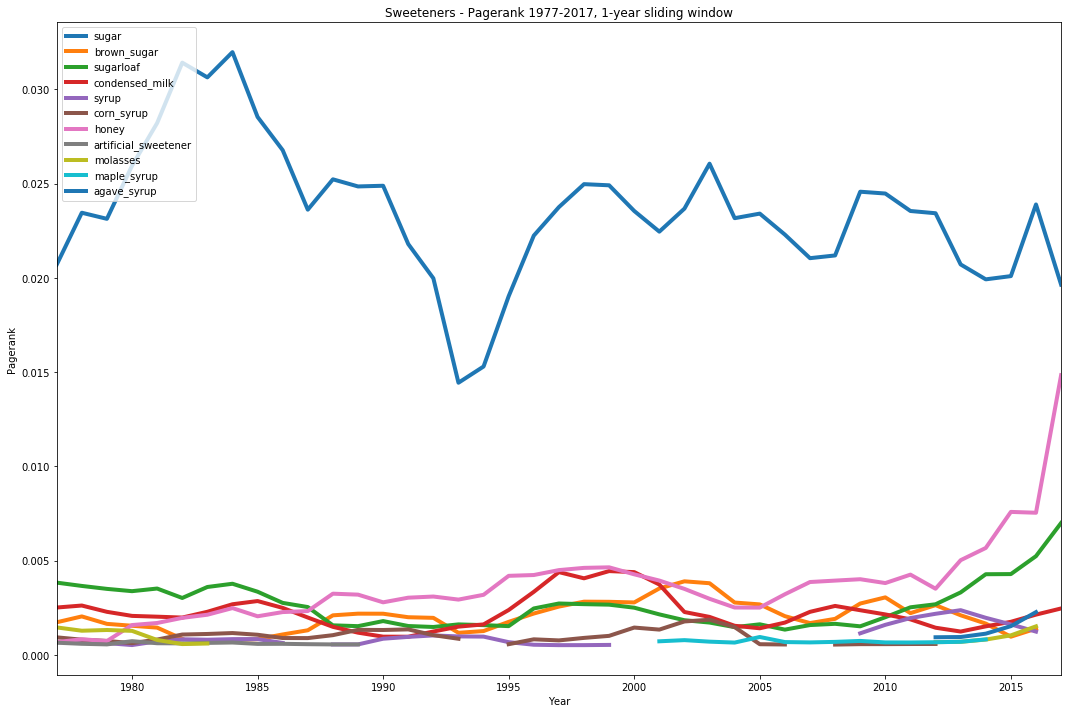

In [133]:
sweeteners_stats = [sugar_stat, brown_sugar_stat, sugarloaf_stat, condensed_milk_stat, syrup_stat, corn_syrup_stat, honey_stat, 
         artificial_sweetener_stat, molasses_stat, maple_syrup_stat, agave_syrup_stat]

df_ss=pd.DataFrame(sweeteners_stats, columns = year_stat, index = sweeteners)
#print(df_ss)
print(df_ss)

# plt.plot(num_people_v_random_BA, num_people_s_random_BA, color='b')

sweeteners_stats = [sugar_stat, brown_sugar_stat, sugarloaf_stat, condensed_milk_stat, syrup_stat, corn_syrup_stat, honey_stat, 
         artificial_sweetener_stat, molasses_stat, maple_syrup_stat, agave_syrup_stat]

plt.figure(figsize=(18,12))

for x in sweeteners_stats:
    plt.plot(year_stat, x, linewidth=4, alpha=1)
    
plt.legend(sweeteners, loc = 'upper left', frameon=True)
plt.xlabel('Year')
plt.ylabel('Pagerank')
plt.title('Sweeteners - Pagerank 1977-2017, 1-year sliding window')
    
plt.xlim(1977,2017)

#len(sweeteners_stats)

plt.savefig('sweetnerssandnetworksgraph1y.svg')
plt.savefig('sweetnerssandnetworksgraph1y.jpeg', dpi = 300)
plt.savefig('sweetnerssandnetworksgraphtransparent1y.jpeg', transparent = True, dpi = 300)

plt.show()

Analysis Month to month. Either with sliding window or cumulative

In [22]:
##Monthly ANALYSIS

#define functions
#def stat_of_interest(statdict,ingredient):
    #iterate over vaccinated people to get their neighbors
#    if ingredient in statdict:
#        result = statdict[ingredient] / statdict[max(statdict, key=statdict.get)]
#    if ingredient not in statdict:
#        result = 1 + np.nan
#    return result
    
def stat_of_interest(statdict,ingredient):
    #iterate over vaccinated people to get their neighbors
    if ingredient in statdict:
        result = statdict[ingredient]
    if ingredient not in statdict:
        result = 1 + np.nan
    return result    
    
#define variables
year_stat = []

sugar_stat = []
brown_sugar_stat = []
sugarloaf_stat = []
condensed_milk_stat = []
syrup_stat = []
corn_syrup_stat = []
honey_stat = []
artificial_sweetener_stat = []
molasses_stat = []
maple_syrup_stat = []
agave_syrup_stat = []

#get statistic of interest (YEAR)
for x in range(1, 13, 1):
    #WARNING: Be careful with these parameters: change according to decade and/or period of study!!!!
    temp_df = carrusel_df.loc[(carrusel_df['month'] == x) & (carrusel_df['year'] >= 2007) & (carrusel_df['year'] <2018)]
    #(carrusel_df.loc[(carrusel_df['year'] < (x + 5)) & (carrusel_df['year'] >= x)])
    nodesrecipes_temp = list(temp_df.recipe_name.unique())
    nodesingredients_temp = list(temp_df.ingredient_en.unique())
    edgesrecipeingredient_temp = list(zip(temp_df.recipe_name, temp_df.ingredient_en))
  #create Temporal Bipartite Network
  #here we are creating an empty graph (network)
    B_temp = nx.Graph()
  #we are adding the nodes, which we loaded on the previous step. 
  #note how we add the bipartite nodes below
    B_temp.add_nodes_from(nodesrecipes_temp, bipartite=0)
    B_temp.add_nodes_from(nodesingredients_temp, bipartite=1)
  #add edges
    B_temp.add_edges_from(edgesrecipeingredient_temp)
    G_temp = bipartite.weighted_projected_graph(B_temp,nodesingredients_temp)
    
  #get the statistic of interest !
    #stats_result = dict(nx.degree(G_temp))
    stats_result = dict(nx.pagerank(G_temp)) 
    
  #populate variables
    year_stat.append(x)
    
    sugar_stat.append(stat_of_interest(stats_result,'sugar'))
    brown_sugar_stat.append(stat_of_interest(stats_result,'brown_sugar'))
    sugarloaf_stat.append(stat_of_interest(stats_result,'sugarloaf'))
    condensed_milk_stat.append(stat_of_interest(stats_result,'condensed_milk'))
    syrup_stat.append(stat_of_interest(stats_result,'syrup'))
    corn_syrup_stat.append(stat_of_interest(stats_result,'corn_syrup'))
    honey_stat.append(stat_of_interest(stats_result,'honey'))
    artificial_sweetener_stat.append(stat_of_interest(stats_result,'artificial_sweetener'))
    molasses_stat.append(stat_of_interest(stats_result,'molasses'))
    maple_syrup_stat.append(stat_of_interest(stats_result,'maple_syrup'))
    agave_syrup_stat.append(stat_of_interest(stats_result,'agave_syrup'))

                            1         2         3         4         5   \
sugar                 0.021647  0.017996  0.019930  0.016525  0.022567   
brown_sugar           0.003774  0.003331  0.001978  0.003790  0.003667   
sugarloaf                  NaN  0.005199  0.001634  0.001493       NaN   
condensed_milk             NaN  0.003289       NaN  0.003734  0.002529   
syrup                      NaN       NaN  0.004823       NaN  0.001529   
corn_syrup                 NaN       NaN       NaN       NaN       NaN   
honey                 0.007627       NaN       NaN  0.001905  0.007008   
artificial_sweetener       NaN       NaN       NaN       NaN       NaN   
molasses                   NaN       NaN       NaN       NaN       NaN   
maple_syrup                NaN       NaN       NaN       NaN  0.002700   
agave_syrup                NaN       NaN       NaN       NaN       NaN   

                            6         7         8         9         10  \
sugar                 0.020497  0.011

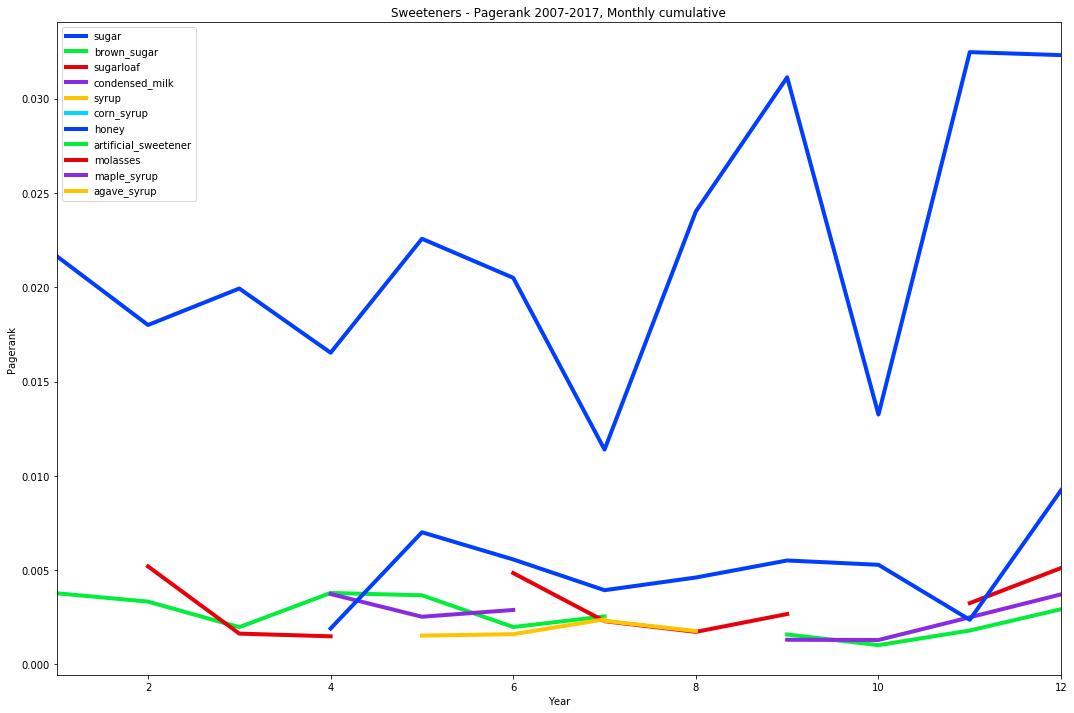

In [23]:
sweeteners_stats = [sugar_stat, brown_sugar_stat, sugarloaf_stat, condensed_milk_stat, syrup_stat, corn_syrup_stat, honey_stat, 
         artificial_sweetener_stat, molasses_stat, maple_syrup_stat, agave_syrup_stat]

df_ss=pd.DataFrame(sweeteners_stats, columns = year_stat, index = sweeteners)
#print(df_ss)
print(df_ss)

# plt.plot(num_people_v_random_BA, num_people_s_random_BA, color='b')

sweeteners_stats = [sugar_stat, brown_sugar_stat, sugarloaf_stat, condensed_milk_stat, syrup_stat, corn_syrup_stat, honey_stat, 
         artificial_sweetener_stat, molasses_stat, maple_syrup_stat, agave_syrup_stat]

plt.figure(figsize=(18,12))

for x in sweeteners_stats:
    plt.plot(year_stat, x, linewidth=4, alpha=1)
    
plt.legend(sweeteners, loc = 'upper left', frameon=True)
plt.xlabel('Year')
plt.ylabel('Pagerank')
plt.title('Sweeteners - Pagerank 2007-2017, Monthly cumulative')
plt.xlim(1,12)

#Be careful with these plot titles: change according to decade and/or period of study
plt.savefig('sweetnerssandnetworksgraphm07_17.svg')
plt.savefig('sweetnerssandnetworksgraph1m07_17.jpeg', dpi = 300)
plt.savefig('sweetnerssandnetworksgraphtransparent1m07_17.jpeg', transparent = True, dpi = 300)


plt.show()
#len(sweeteners_stats)